# Problem Addressed  
Skin cancer is a major global health issue, with millions of new cases diagnosed annually. Early and accurate detection is critical for successful treatment and improved patient outcomes. One of the most effective methods for diagnosing skin cancer is through dermoscopic imaging, a non-invasive technique that allows for the visualization of deeper layers of the skin. However, manual interpretation of these images by dermatologists can be time-consuming and prone to human error, particularly when distinguishing between malignant and benign lesions.

# ISIC 2019 Challenge
The ISIC 2019 Challenge aims to address this problem by providing a large dataset of dermoscopic images to train machine learning models for the classification of skin lesions. The goal is to categorize images into one of nine diagnostic categories, including serious conditions such as melanoma and basal cell carcinoma, as well as more benign lesions. Accurate classification is crucial because it can assist dermatologists in making more informed decisions about whether a lesion requires further investigation, such as a biopsy.

# Dataset Description
The dataset for ISIC 2019 contains 25,331 images available for the classification of dermoscopic images among nine different diagnostic categories:

- Seborrheic Keratosis
- Vascular Lesion
- Basal Cell Carcinoma
- Melanoma
- Squamous Cell Carcinoma
- Pigmented Benign Keratosis
- Dermatofibroma
- Nevus
- Actinic Keratosis



# Objective
The objective of this project is to build a deep learning model using PyTorch that can classify dermoscopic images into one of the nine categories mentioned in the ISIC 2019 dataset. The focus is not only on solving this problem in particular but also on understanding the process of building, training, and evaluating the model so that the acquired knowledge can be transferable to future projects.


# Performance Metrics
The following metrics will be used to evaluate the model:
- **Precision, Recall, F1-Score**: To handle class imbalance and assess performance per class.
- **ROC-AUC**: For a more nuanced view of the model’s discriminatory ability


# Challenges
- **Class Imbalance**: The dataset contains many more benign lesions than malignant ones. This imbalance can make it difficult for the model to learn to correctly classify rare but dangerous categories like melanoma. This will be addressed using techniques such as weighted loss functions or data augmentation.
- **Model Overfitting**: With a large number of images and possible overfitting, we will explore techniques such as dropout, regularization, and early stopping.
- **Limited GPU Time**: Since the GPU resource is limited, the model will be optimized to converge efficiently using techniques like learning rate scheduling and batch size adjustments.


# Advantages of applying ML to the problem

### Time Efficiency: 
Manual examination of dermoscopic images by dermatologists is a time-consuming process, especially when handling large volumes of cases. Machine learning models, once trained, can analyze and classify skin lesions almost instantaneously, greatly reducing the time spent per diagnosis. This enables dermatologists to focus on more complex cases and prioritize patients with potentially serious conditions, improving overall efficiency in clinical settings.

### Cost Reduction: 
The use of ML for skin lesion classification can lead to substantial cost savings by reducing the need for unnecessary biopsies. ML models can help in accurately identifying benign lesions, sparing patients from costly and invasive procedures. Furthermore, automating initial screenings of dermoscopic images can lower the workload on healthcare professionals, allowing hospitals and clinics to operate more cost-effectively by minimizing the need for additional staffing to handle large case volumes.



# Resources
## GPU and dataset : 
- Kaggle's free access to NVIDIA TESLA P100 GPUs for training and testing.
- Publicly available ISIC 2019 dataset
## Libraries :
- PyTorch
- Tqdm
- Pillow
- os module
- sklearn

# Plan of Action
1. [**Data Loading and Exploration**](#1.-Data-Loading-and-Exploration)
2. [**Data Preprocessing**](#2.-PreProcessing)
3. [**Model Architecture**](#3.-Model-Architecture)
4. [**Training**](#4.-Model-Training)
5. [**Evaluation**](#5.-Evaluation)
6. [**Results Analysis**](#6.-Result-Analysis)
7. [**Conclusion**](#7.-Conclusion)
8. [**Recommendations for Future Improvements**](#8.-Recommendations-for-Future-Improvements)


# 1. Data Loading and Exploration

## 1.a Imports, Installations and Downloads

In [6]:
# General imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm import tqdm  
import timm
from IPython.display import Image as disp


# PyTorch imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, models, transforms
import torch.nn.functional as F
!pip install torchviz
from torchviz import make_dot
from torch.utils.data import DataLoader, random_split


# Sklearn for train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_auc_score, roc_curve

# Kaggle Installation (for downloading the dataset)
!pip install kaggle

# Define path for images 
data_folder = './data/skin-cancer/'


  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=1a661061e5e10490e01879d0ab940d8c0037f14c2b669d9dcd86a6dd39eb78b5
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [7]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
# Downloading dataset and storing it into the working folder ./data/skin-cancer/
data_folder = './data/skin-cancer/'
os.makedirs(data_folder, exist_ok=True)
!kaggle datasets download -d nodoubttome/skin-cancer9-classesisic
!unzip skin-cancer9-classesisic.zip -d {data_folder}
print("Done")

Dataset URL: https://www.kaggle.com/datasets/nodoubttome/skin-cancer9-classesisic
License(s): other
100%|████████████████████████████████████████| 786M/786M [00:22<00:00, 32.3MB/s]
100%|████████████████████████████████████████| 786M/786M [00:22<00:00, 36.2MB/s]
Archive:  skin-cancer9-classesisic.zip
  inflating: ./data/skin-cancer/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: ./data/skin-cancer/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: ./data/skin-cancer/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: ./data/skin-cancer/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: ./data/skin-cancer/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: ./data

### Setting up Wandb for tracking metrics

In [9]:
# pip install wandb


In [10]:
import wandb
wandb.login(key="")


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

In [11]:
wandb.init(
    project="isic_dataset_pipeline"
)

## 1.b Dataset Exploration

### Checking Class Distribution

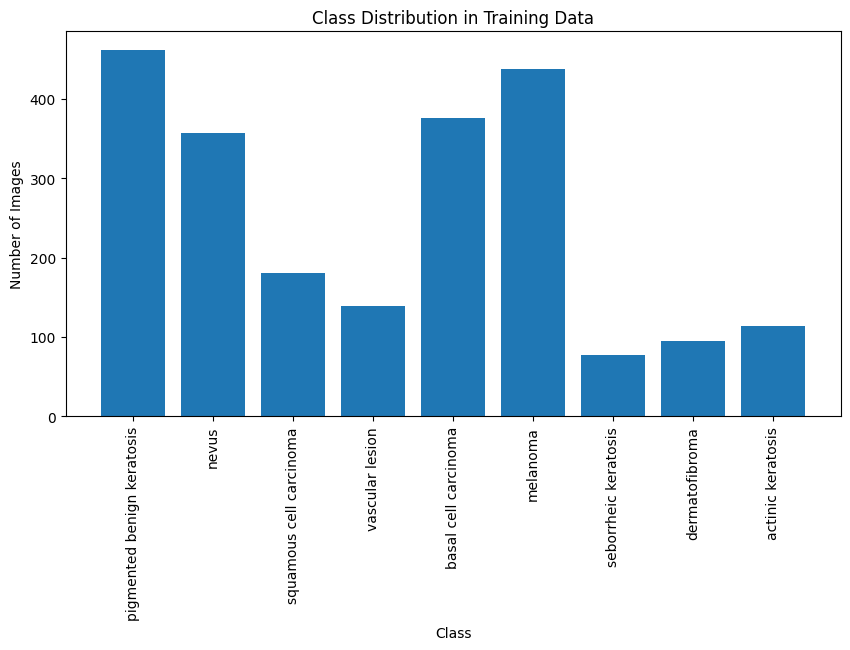

In [12]:
# Path to train data
train_dir = os.path.join(data_folder, 'Skin cancer ISIC The International Skin Imaging Collaboration/Train')
# Path to test data
test_dir = os.path.join(data_folder, 'Skin cancer ISIC The International Skin Imaging Collaboration/Test')

# Get all class folders
class_names = os.listdir(train_dir)

# Count number of images per class
image_count_per_class = {class_name: len(os.listdir(os.path.join(train_dir, class_name))) for class_name in class_names}

# Plot clas distribution
plt.figure(figsize=(10, 5))
plt.bar(image_count_per_class.keys(), image_count_per_class.values())
plt.xticks(rotation=90)
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

We can see class imbalance here. The model may become biased toward the classes with more data, learning to predict those classes more accurately while struggling with the other classes. This can lead to poor performance on the minority classes. Therefore, standard metrics like accuracy may not reflect the model's true performance.A model could achieve high accuracy by simply predicting the majority classes most of the time, ignoring the minority classes.

### To check if images have consistent shapes or need resizing:

In [13]:
image_shapes = []

# Looping through each class to get their shapes
for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    image_name = os.listdir(class_path)[0]  # Picking one image from the class
    image = Image.open(os.path.join(class_path, image_name))
    image_shapes.append(image.size)

# Printing size of images of one sample from each class
print("Sample image shapes:", image_shapes)

Sample image shapes: [(600, 450), (600, 450), (600, 450), (600, 450), (600, 450), (1024, 768), (1024, 768), (600, 450), (600, 450)]


If we resize an image without considering its aspect ratio, we might stretch or compress it, leading to distortion. So here we might first apply cropping or padding to prevent distortion, where each class may be applied with its own unique padding or cropping. This step may also help reduce unnecessary overhead of resizing in some casees where the image size is already compatible with the model.

### Displaying Example Images

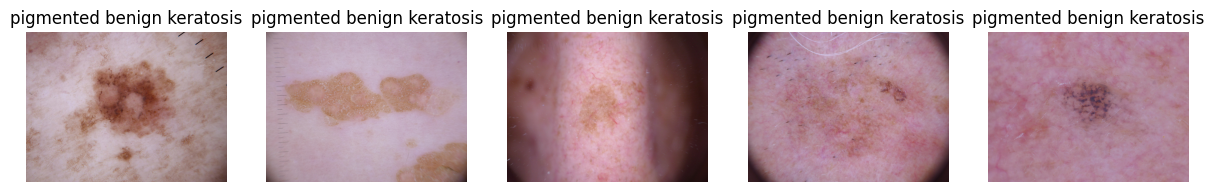

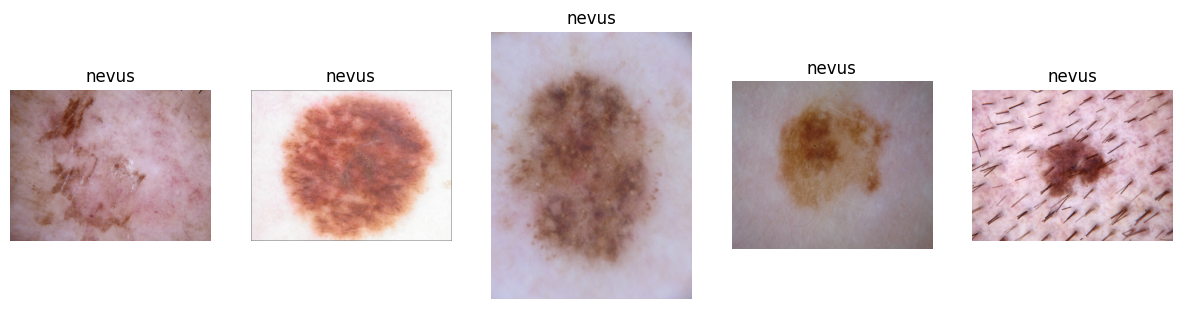

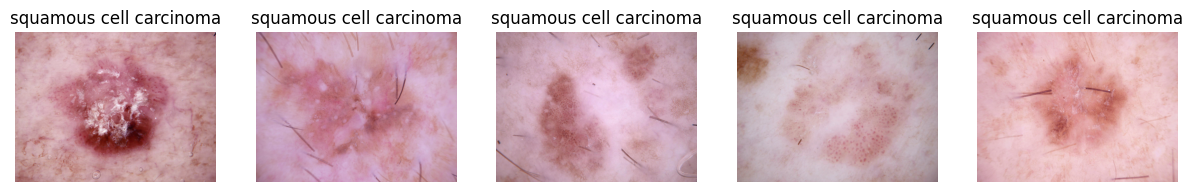

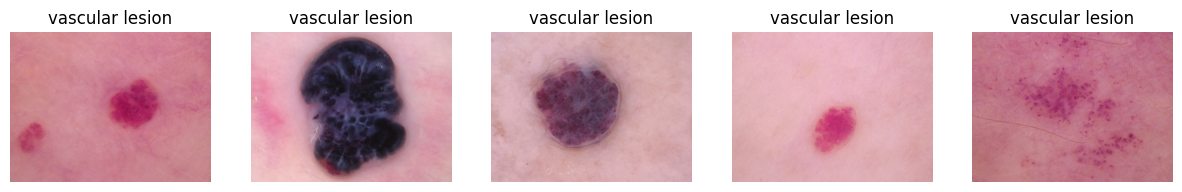

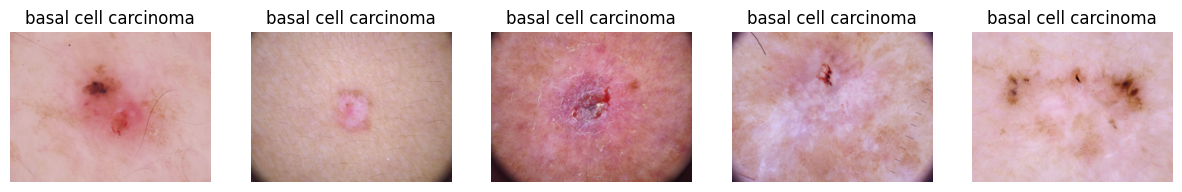

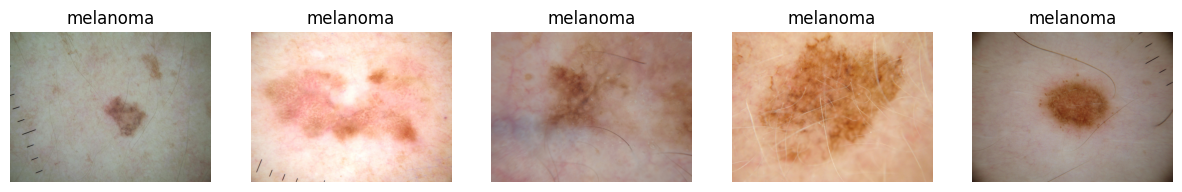

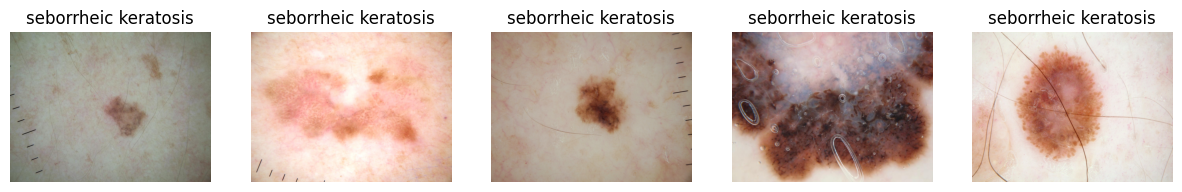

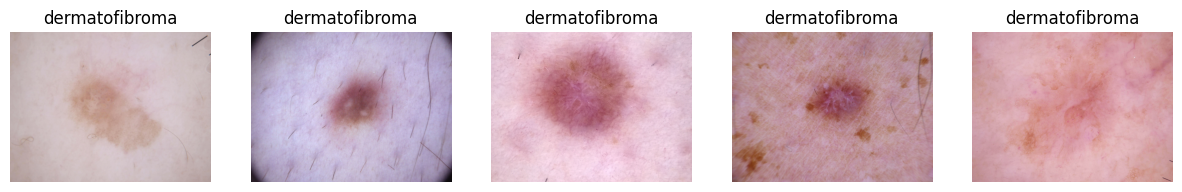

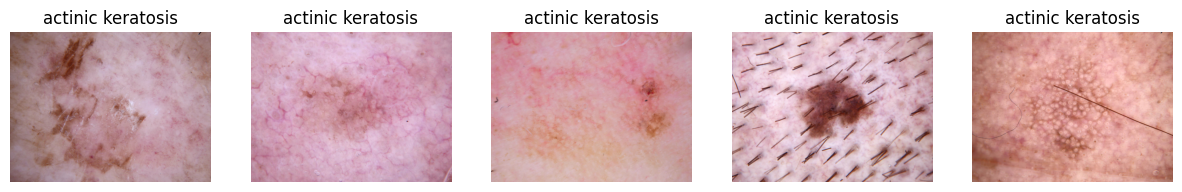

In [14]:
# Function to show 'num_images' numeber of images for a given class 'class_name'
def show_images(class_name, num_images=5):
    class_path = os.path.join(train_dir, class_name)
    image_files = os.listdir(class_path)[:num_images]
    
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(class_path, image_file)
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(class_name)
    
    plt.show()

# Observing 5 example images for each class
for class_name in class_names:
    show_images(class_name, num_images=5)


### Image Color Channels Analysis
For color images, it’s useful to analyze the color distribution of each RGB channel to understand if any channel dominates.
This gives an idea of the color balance across images, and whether additional normalization of the RGB channels is necessary.

Mean Values: {'R': 189.65290137087413, 'G': 149.56077503567448, 'B': 149.6468725908114}
Standard Deviation Values: {'R': 23.16890311218165, 'G': 21.02320512160073, 'B': 23.86261502256139}


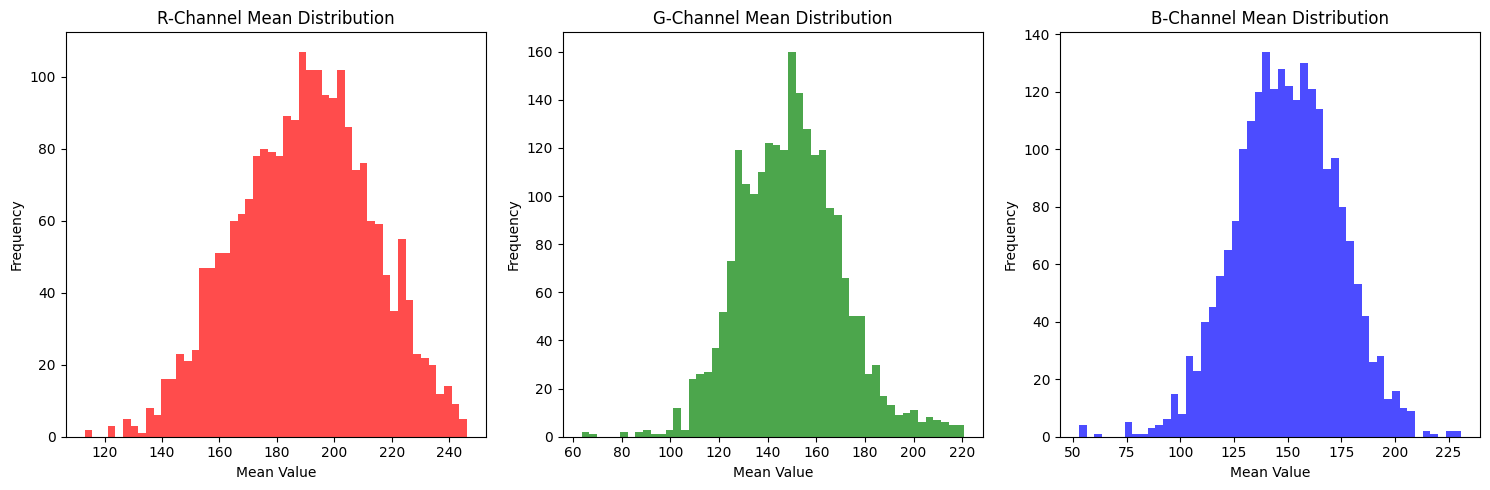

In [16]:
# Dictionary to hold color means
color_means = {'R': [], 'G': [], 'B': []}

# Compute mean of each color channel
for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        image = Image.open(image_path)
        image_array = np.array(image)
        
        # Average color channel values
        color_means['R'].append(image_array[:, :, 0].mean())
        color_means['G'].append(image_array[:, :, 1].mean())
        color_means['B'].append(image_array[:, :, 2].mean())

# Calculate mean and standard deviation for each channel
mean_values = {color: np.mean(color_means[color]) for color in ['R', 'G', 'B']}
std_values = {color: np.std(color_means[color]) for color in ['R', 'G', 'B']}

# Print the results
print("Mean Values:", mean_values)
print("Standard Deviation Values:", std_values)

# Plot histograms for each channel
plt.figure(figsize=(15, 5))
for i, color in enumerate(['R', 'G', 'B']):
    plt.subplot(1, 3, i+1)
    plt.hist(color_means[color], bins=50, color=color.lower(), alpha=0.7)
    plt.title(f'{color}-Channel Mean Distribution')
    plt.xlabel('Mean Value')
    plt.ylabel('Frequency')
plt.tight_layout()  # Adjusts the layout to prevent overlap
plt.show()


# 2. Data PreProcessing

Dermoscopic images differ significantly from natural images due to their high resolution, low color variability, and the presence of artifacts like pen marks and black corners from acquisition devices. This uniqueness comes from the images' subject(human skin) and the specialized techniques used to capture them, which manipulate light interaction with the epidermis.
To effectively process these images, it's essential to adopt tailored preprocessing steps and data augmentation (DA) strategies, rather than relying on methods designed for natural images. One of the first steps is to compute the mean and standard deviation of the dataset, which is essential for normalizing the input data. This normalization is crucial for training neural networks effectively and should be consistently applied during inference.

In [27]:

# Scaling to [0, 1]
mean_scaled = {key: value / 255 for key, value in mean_values.items()}
std_scaled = {key: value / 255 for key, value in std_values.items()}

# Composing transforms that will be applied sequentially for modularity, ease of use.
data_transforms = {
    'train': transforms.Compose([
        transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([mean_scaled['R'], mean_scaled['G'], mean_scaled['B']], 
                             [std_scaled['R'], std_scaled['G'], std_scaled['B']])
    ]),
    'test': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([mean_scaled['R'], mean_scaled['G'], mean_scaled['B']], 
                             [std_scaled['R'], std_scaled['G'], std_scaled['B']])
    ]),
}




In [28]:
# Load datasets using ImageFolder
train_dataset = datasets.ImageFolder(root=train_dir, transform=data_transforms['train'])
test_dataset = datasets.ImageFolder(root=test_dir, transform=data_transforms['test'])
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size

# Split 
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True, num_workers=4)


# 3. Model Architecture

## ResNet-18
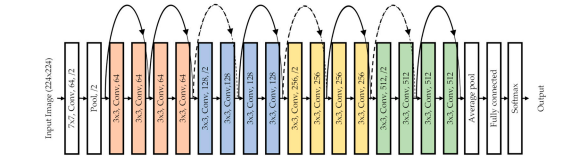

**Reference:** Brown, Jason & Gharineiat, Zahra & Raj, Nawin. (2022). CNN Based Image Classification of Malicious UAVs. *Applied Sciences*, 13, 240. https://doi.org/10.3390/app13010240.

ResNet-18 (Residual Network) is a convolutional neural network architecture that was introduced by Kaiming He et al. in 2015. It is a variant of the ResNet family that features 18 layers and is widely known for its innovative use of skip connections or residual connections. This architecture significantly changed the landscape of deep learning for computer vision by allowing for the training of much deeper networks without encountering the vanishing gradient problem.


In [1]:
import torch
import torch.nn as nn

class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        identity = x
        if self.downsample is not None:
            identity = self.downsample(x)

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)

        out += identity
        out = self.relu(out)

        return out

class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=1000):
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
        
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

    def _make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if stride != 1 or self.in_channels != out_channels * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels * block.expansion, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels * block.expansion),
            )

        layers = [block(self.in_channels, out_channels, stride, downsample)]
        self.in_channels = out_channels * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.in_channels, out_channels))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

def resnet18(num_classes=1000):
    return ResNet(BasicBlock, [2, 2, 2, 2], num_classes=num_classes)


In [2]:
pip install torchviz


  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=9165aa1dfc8be52f424fd8c886e510710c3c43b89ffac6e441a1a3333ad5c155
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz
Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch
from torchviz import make_dot

# Initialize the model
model = resnet18(num_classes=1000)

# Create a sample input to pass through the model
x = torch.randn(1, 3, 224, 224)

# Forward pass to generate the computation graph
y = model(x)

# Generate the visualization
dot = make_dot(y, params=dict(model.named_parameters()))
dot.format = "png"  # You can also use 'pdf' if preferred
dot.render("resnet18_visualization")  # Save it to a file


'resnet18_visualization.png'

# 4. Model Training

In [39]:
def train_and_validate(model, train_loader, val_loader, num_epochs=25, patience=15, checkpoint_dir='checkpoints'):
    # Move model to GPU or CPU
    model.to(device)

    # Ensure the checkpoint directory exists
    os.makedirs(checkpoint_dir, exist_ok=True)

    best_val_loss = float('inf')
    epochs_without_improvement = 0

    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        
        # Progress bar for training
        train_loader_tqdm = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Training]", unit="batch")
        
        for images, labels in train_loader_tqdm:
            # Move images and labels to the GPU
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Track training statistics
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)

            # Update tqdm bar
            train_loader_tqdm.set_postfix(loss=running_loss/len(train_loader), accuracy=correct_train/total_train)

        # Validation loop with tqdm
        model.eval()  # Set model to evaluation mode
        correct_val = 0
        total_val = 0
        val_loss = 0.0

        val_loader_tqdm = tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Validation]", unit="batch")
        
        with torch.no_grad():
            for images, labels in val_loader_tqdm:
                # Move images and labels to the GPU
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                correct_val += (predicted == labels).sum().item()
                total_val += labels.size(0)

                # Update tqdm bar
                val_loader_tqdm.set_postfix(loss=val_loss/len(val_loader), accuracy=correct_val/total_val)

        # Calculate average validation loss
        avg_val_loss = val_loss / len(val_loader)

        # Early stopping
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            epochs_without_improvement = 0
            # Save checkpoint
            torch.save(model.state_dict(), os.path.join(checkpoint_dir, f'checkpoint_epoch_{epoch + 1}.pth'))
        else:
            epochs_without_improvement += 1

        # Check for early stopping
        if epochs_without_improvement >= patience:
            print(f"Early stopping triggered after {epoch + 1} epochs with no improvement.")
            break

In [40]:

train_and_validate(model, train_loader, val_loader, num_epochs=25)


Epoch 17/25 [Validation]: 100%|██████████| 8/8 [00:03<00:00,  2.32batch/s, accuracy=0.347, loss=1.91] 

Early stopping triggered after 17 epochs with no improvement.


# 5. Evaluation

In [41]:
# Function to evaluate model on the test dataset
def evaluate_model(model, test_loader, class_names):
    model.eval()  # Set model to evaluation mode
    all_labels = []
    all_preds = []
    all_probs = []

    # Run inference on the test set
    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc="Testing", unit="batch"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            probs = F.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, 1)

            # Store labels and predictions
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())
            all_probs.append(probs.cpu().numpy())
    all_probs = np.concatenate(all_probs)  
          
    # Calculate overall accuracy
    accuracy = accuracy_score(all_labels, all_preds)
    print(f'Overall Accuracy: {accuracy:.4f}')

    # Class-wise precision, recall, F1-score
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average=None, labels=np.arange(len(class_names)))

    # Print class-wise results
    for i, class_name in enumerate(class_names):
        print(f"\nClass: {class_name}")
        print(f"Precision: {precision[i]:.4f}")
        print(f"Recall: {recall[i]:.4f}")
        print(f"F1-Score: {f1[i]:.4f}")

    # Print overall precision, recall, F1-score
    precision_avg, recall_avg, f1_avg, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
    print(f'\nOverall Precision: {precision_avg:.4f}')
    print(f'Overall Recall: {recall_avg:.4f}')
    print(f'Overall F1-Score: {f1_avg:.4f}')
    return all_labels, all_preds, all_probs  



In [42]:
all_labels, all_preds, all_probs = evaluate_model(model, test_loader, class_names)

Testing: 100%|██████████| 8/8 [00:03<00:00,  2.33batch/s]

Overall Accuracy: 0.3475

Class: pigmented benign keratosis
Precision: 0.6000
Recall: 0.1875
F1-Score: 0.2857

Class: nevus
Precision: 0.3030
Recall: 0.6250
F1-Score: 0.4082

Class: squamous cell carcinoma
Precision: 0.6667
Recall: 0.1250
F1-Score: 0.2105

Class: vascular lesion
Precision: 0.1765
Recall: 0.1875
F1-Score: 0.1818

Class: basal cell carcinoma
Precision: 0.4643
Recall: 0.8125
F1-Score: 0.5909

Class: melanoma
Precision: 0.2727
Recall: 0.3750
F1-Score: 0.3158

Class: seborrheic keratosis
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000

Class: dermatofibroma
Precision: 0.3333
Recall: 0.0625
F1-Score: 0.1053

Class: actinic keratosis
Precision: 0.4286
Recall: 1.0000
F1-Score: 0.6000

Overall Precision: 0.3928
Overall Recall: 0.3475
Overall F1-Score: 0.2998



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

def compute_and_plot_roc_auc_for_class(model, test_loader, target_class_index):
    model.eval()
    all_labels = []
    all_probs = []

    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc="Evaluating", unit="batch"):
            images = images.to(device)
            outputs = model(images)
            probs = F.softmax(outputs, dim=1)  # Get probabilities for each class

            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    # Convert to NumPy arrays
    all_labels = np.array(all_labels)
    all_probs = np.array(all_probs)

    # Binarize the labels for the target class
    binary_labels = (all_labels == target_class_index).astype(int)

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(binary_labels, all_probs[:, target_class_index])
    
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(binary_labels, all_probs[:, target_class_index])

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for class: {class_names[target_class_index]}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    return roc_auc




#### For best performing class

Evaluating: 100%|██████████| 8/8 [00:04<00:00,  1.88batch/s]


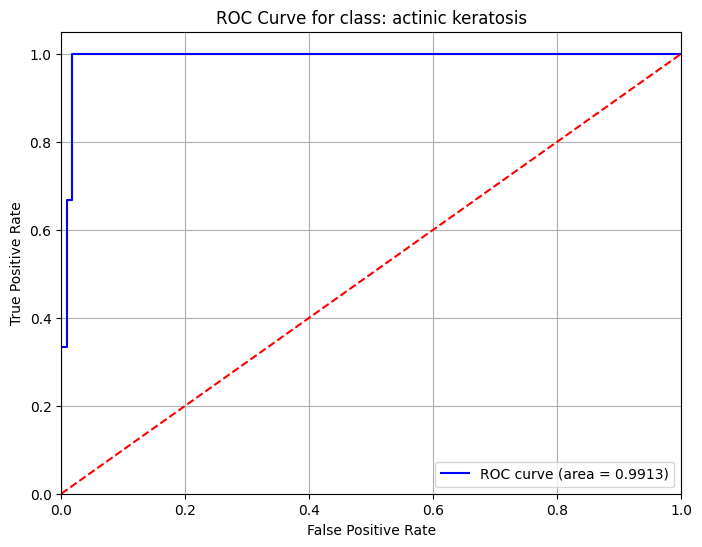

ROC AUC for class actinic keratosis: 0.9913


In [44]:

target_class_name = 'actinic keratosis'  # Replacing with my target class name
target_class_index = class_names.index(target_class_name)  # Get the index of the target class
roc_auc = compute_and_plot_roc_auc_for_class(model, test_loader, target_class_index)
print(f'ROC AUC for class {target_class_name}: {roc_auc:.4f}')

#### For worst performing class

Evaluating: 100%|██████████| 8/8 [00:04<00:00,  1.89batch/s]


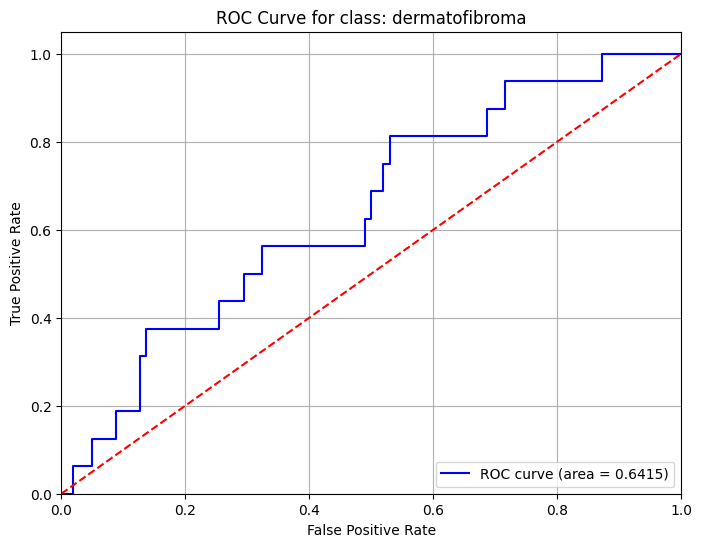

ROC AUC for class dermatofibroma: 0.6415


In [45]:

target_class_name = 'dermatofibroma'  # Replacing with my target class name
target_class_index = class_names.index(target_class_name)  # Get the index of the target class
roc_auc = compute_and_plot_roc_auc_for_class(model, test_loader, target_class_index)
print(f'ROC AUC for class {target_class_name}: {roc_auc:.4f}')

# 6. Result Analysis

In [46]:
def visualize_predictions_with_uncertainty(model, test_loader, class_names, num_images=2):
    model.eval()  # Set the model to evaluation mode
    correct_preds = {class_name: [] for class_name in class_names}
    wrong_preds = {class_name: [] for class_name in class_names}
    
    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc="Evaluating", unit="batch"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            probs = F.softmax(outputs, dim=1)  # Convert logits to probabilities
            _, predicted = torch.max(probs, 1)

            # Check predictions
            for i in range(len(labels)):
                true_label = labels[i].item()
                pred_label = predicted[i].item()
                uncertainty = 1 - probs[i][pred_label].item()  # Calculate uncertainty

                if true_label == pred_label:
                    correct_preds[class_names[true_label]].append((images[i], true_label, pred_label, probs[i], uncertainty))
                else:
                    wrong_preds[class_names[true_label]].append((images[i], true_label, pred_label, probs[i], uncertainty))

    # Visualize predictions
    for class_name in class_names:
        # Only proceed if there are any predictions to show
        if len(correct_preds[class_name]) > 0 or len(wrong_preds[class_name]) > 0:
            rows = 0
            if len(correct_preds[class_name]) > 0:
                rows += 1  # Add a row for correct predictions
            if len(wrong_preds[class_name]) > 0:
                rows += 1  # Add a row for incorrect predictions

            fig, axes = plt.subplots(rows, num_images, figsize=(12, 6))
            fig.suptitle(f'Predictions for class: {class_name}', fontsize=16)
            plt.subplots_adjust(top=0.85, hspace=0.4, wspace=0.3)  # Adjust spacing
            
            row_idx = 0  # Track current row
            
            # Plot correct predictions if available
            if len(correct_preds[class_name]) > 0:
                for i in range(min(num_images, len(correct_preds[class_name]))):
                    img, true_label, pred_label, prob, uncertainty = correct_preds[class_name][i]
                    img = img.cpu().numpy().transpose((1, 2, 0))  # Convert to HWC format
                    img = np.clip(img, 0, 1)  # Ensure values are in range [0, 1]
                    if rows == 1:  # In case there is only 1 row (no wrong predictions)
                        axes[i].imshow(img)
                        axes[i].set_title(f'True: {class_names[true_label]}\nPred: {class_names[pred_label]}\nProb: {prob[pred_label]:.4f}\nUncertainty: {uncertainty:.4f}', fontsize=10)
                        axes[i].axis('off')
                    else:
                        axes[0, i].imshow(img)
                        axes[0, i].set_title(f'True: {class_names[true_label]}\nPred: {class_names[pred_label]}\nProb: {prob[pred_label]:.4f}\nUncertainty: {uncertainty:.4f}', fontsize=10)
                        axes[0, i].axis('off')

                row_idx += 1  # Move to the next row

            # Plot incorrect predictions if available
            if len(wrong_preds[class_name]) > 0:
                for i in range(min(num_images, len(wrong_preds[class_name]))):
                    img, true_label, pred_label, prob, uncertainty = wrong_preds[class_name][i]
                    img = img.cpu().numpy().transpose((1, 2, 0))  # Convert to HWC format
                    img = np.clip(img, 0, 1)  # Ensure values are in range [0, 1]
                    if rows == 1:
                        axes[i].imshow(img)  # In case there's only 1 row (no correct predictions)
                        axes[i].set_title(f'True: {class_names[true_label]}\nPred: {class_names[pred_label]}\nProb: {prob[pred_label]:.4f}\nUncertainty: {uncertainty:.4f}', fontsize=10)
                        axes[i].axis('off')
                    else:
                        axes[row_idx, i].imshow(img)
                        axes[row_idx, i].set_title(f'True: {class_names[true_label]}\nPred: {class_names[pred_label]}\nProb: {prob[pred_label]:.4f}\nUncertainty: {uncertainty:.4f}', fontsize=10)
                        axes[row_idx, i].axis('off')

            plt.show()


Evaluating: 100%|██████████| 8/8 [00:04<00:00,  1.92batch/s]


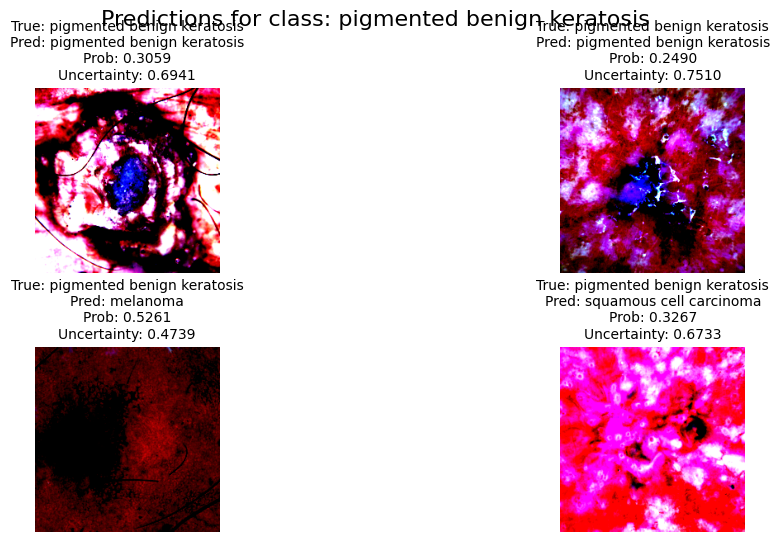

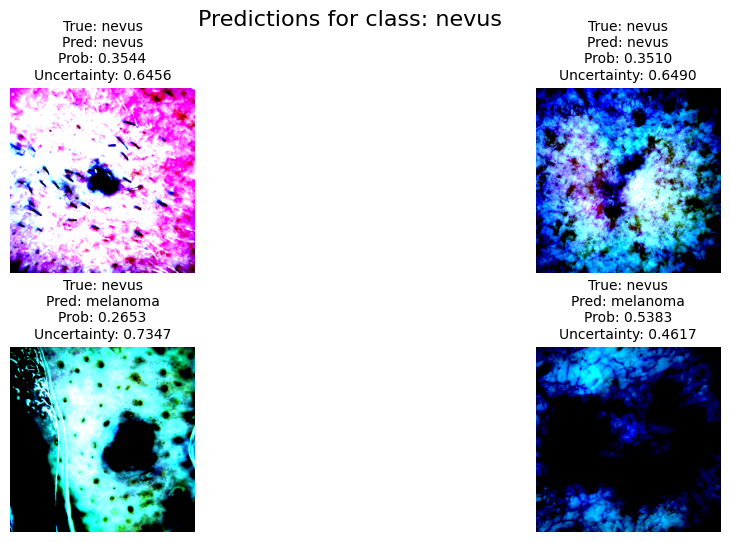

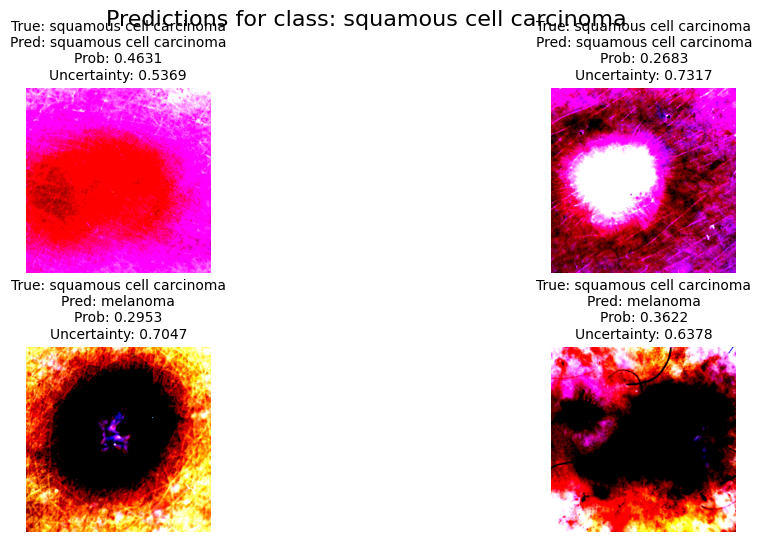

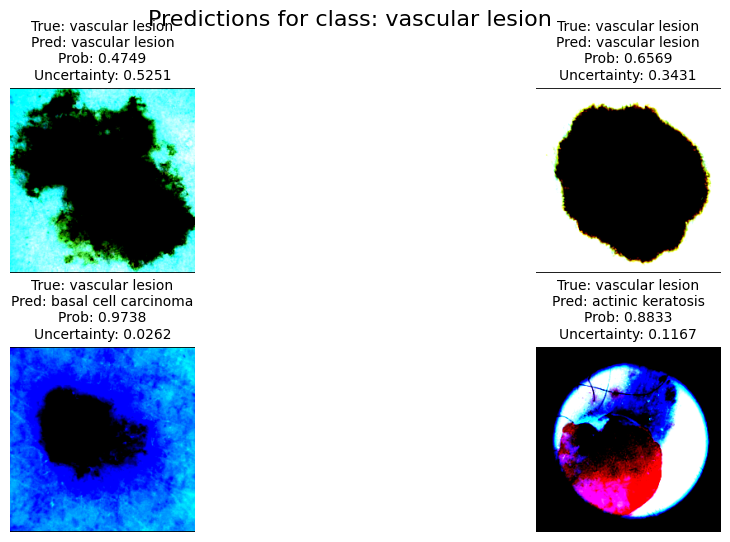

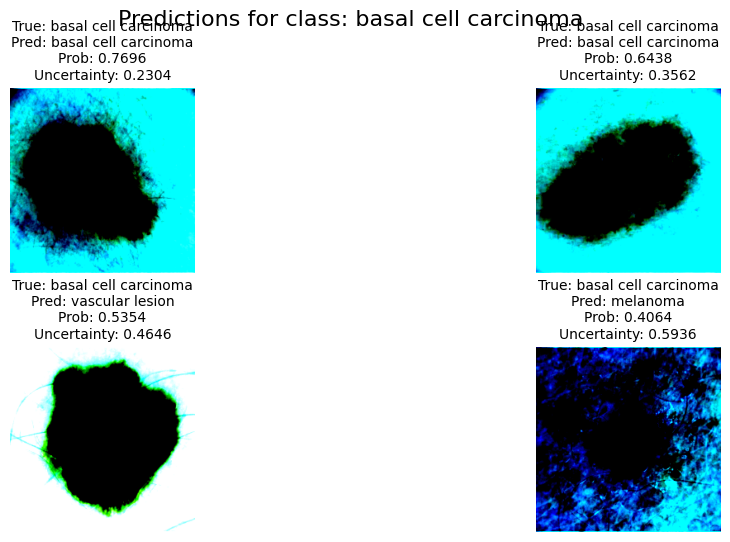

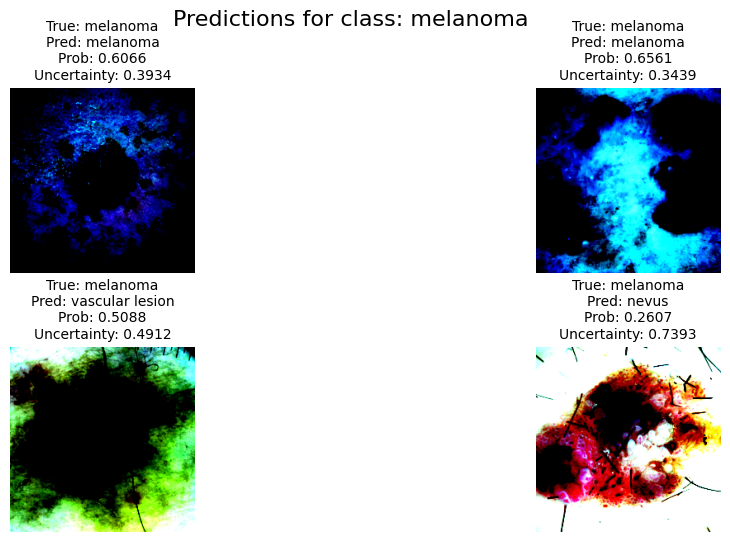

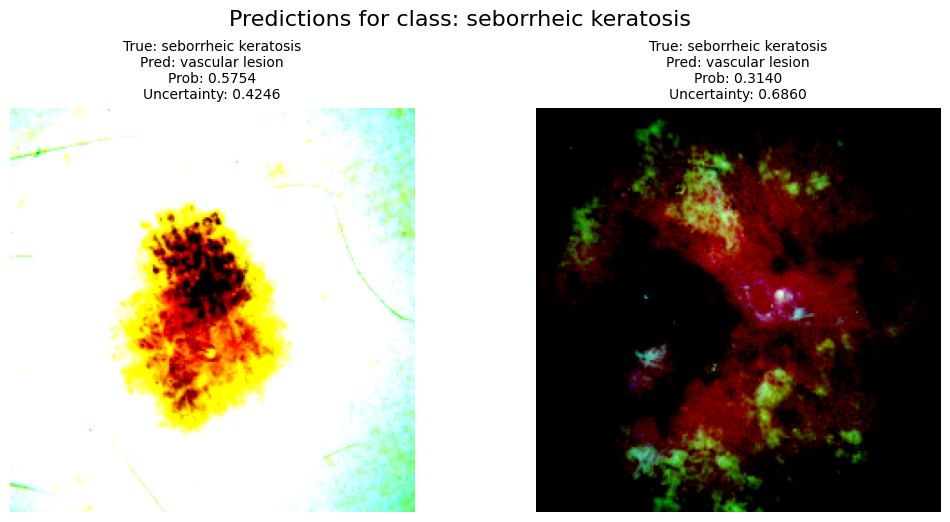

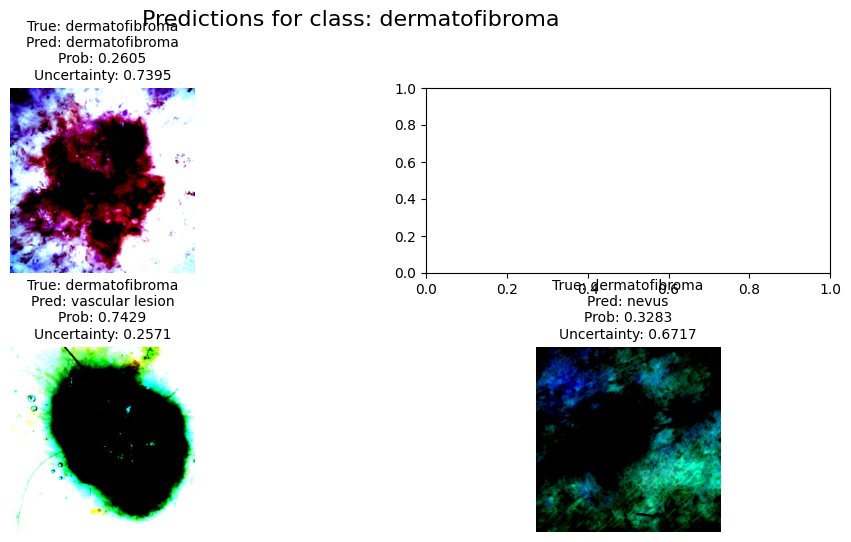

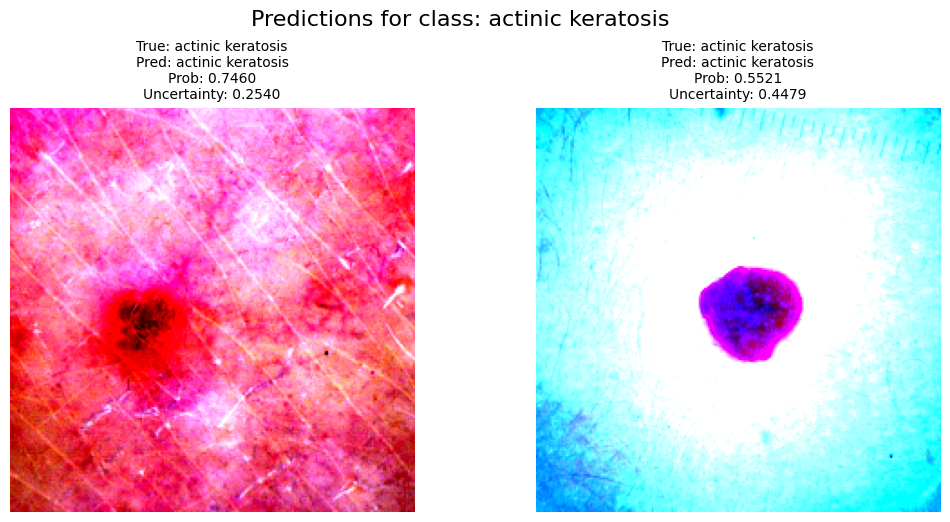

In [47]:
visualize_predictions_with_uncertainty(model, test_loader, class_names)

# 7. Conclusion 



A pipeline has been established to classify images into **nine different classes**. The final results on the test dataset, which consisted of samples from the same distribution but unseen by the model, are as follows:

- **Overall Precision:** 0.4249
- **Overall Recall:** 0.4068
- **Overall F1-Score:** 0.3441

However, these metrics exhibit considerable variation across different classes. For instance, the class *Actinic Keratosis* demonstrated:

- **Precision:** 0.7500
- **Recall:** 1.0000
- **F1-Score:** 0.8571

In contrast, the class *Dermatofibroma* showed:

- **Precision:** 0.5000
- **Recall:** 0.0625
- **F1-Score:** 0.1111

This disparity in performance metrics may be attributed to class imbalance present in the dataset.




# 8. Recommendations for Future Improvements

For anyone addressing this problem in the future, the following strategies are suggested to enhance the model's performance:

- **Data Augmentation:** Implement data augmentation techniques to address class imbalance, or special emphasis should be placed on achieving high recall for sensitive classes, such as *Melanoma*, where the implications of misclassification can be critical.
- **Regularization Techniques:** Integrate regularization methods, such as L2 regularization and dropout, to help prevent overfitting. These techniques can enhance the model's generalization capabilities by discouraging reliance on specific features or weights, thus improving overall performance on unseen data.

# 9. References


1. Pollastri, M., Mascaro, S., Bagnasco, S., & Di Rosa, S. (2022). A deep analysis on high‐resolution dermoscopic image classification. Journal of Biomedical Informatics, 127, 103973.
2. https://medium.com/hackernoon/machine-learning-for-isic-skin-cancer-classification-challenge-part-1-ccddea4ec44a